MNIST with tensorflow test

References:
*   https://www.tensorflow.org/datasets/keras_example
*   https://www.tensorflow.org/tutorials/images/cnn



In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt

## Create input pipe line

In [ ]:
# Load a dataset
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
# Build a training pipeline
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [ ]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

## Create and train the model

In [ ]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model1.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model1.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6
469/469 [==============================] - 14s 8ms/step - loss: 0.3642 - sparse_categorical_accuracy: 0.9005 - val_loss: 0.1936 - val_sparse_categorical_accuracy: 0.9445
Epoch 2/6
469/469 [==============================] - 2s 5ms/step - loss: 0.1637 - sparse_categorical_accuracy: 0.9537 - val_loss: 0.1358 - val_sparse_categorical_accuracy: 0.9601
Epoch 3/6
469/469 [==============================] - 2s 5ms/step - loss: 0.1175 - sparse_categorical_accuracy: 0.9663 - val_loss: 0.1109 - val_sparse_categorical_accuracy: 0.9678
Epoch 4/6
469/469 [==============================] - 2s 5ms/step - loss: 0.0912 - sparse_categorical_accuracy: 0.9734 - val_loss: 0.1018 - val_sparse_categorical_accuracy: 0.9698
Epoch 5/6
469/469 [==============================] - 2s 5ms/step - loss: 0.0740 - sparse_categorical_accuracy: 0.9787 - val_loss: 0.0870 - val_sparse_categorical_accuracy: 0.9742
Epoch 6/6
469/469 [==============================] - 2s 5ms/step - loss: 0.0604 - sparse_categorical_acc

In [ ]:
model2 = tf.keras.models.Sequential()
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))

model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10))

# model2.summary()

In [ ]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# history = model2.fit(ds_train, epochs=10, 
#                     validation_data=ds_test)
history2 = model2.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test,
)

Epoch 1/6
469/469 [==============================] - 61s 118ms/step - loss: 0.2470 - accuracy: 0.9271 - val_loss: 0.0538 - val_accuracy: 0.9827
Epoch 2/6
469/469 [==============================] - 54s 114ms/step - loss: 0.0637 - accuracy: 0.9801 - val_loss: 0.0401 - val_accuracy: 0.9875
Epoch 3/6
469/469 [==============================] - 50s 106ms/step - loss: 0.0425 - accuracy: 0.9869 - val_loss: 0.0407 - val_accuracy: 0.9874
Epoch 4/6
469/469 [==============================] - 50s 106ms/step - loss: 0.0336 - accuracy: 0.9899 - val_loss: 0.0336 - val_accuracy: 0.9899
Epoch 5/6
469/469 [==============================] - 50s 106ms/step - loss: 0.0281 - accuracy: 0.9915 - val_loss: 0.0405 - val_accuracy: 0.9877
Epoch 6/6
469/469 [==============================] - 50s 106ms/step - loss: 0.0231 - accuracy: 0.9929 - val_loss: 0.0274 - val_accuracy: 0.9912


79/79 - 0s - loss: 0.0363 - accuracy: 0.9894 - 474ms/epoch - 6ms/step


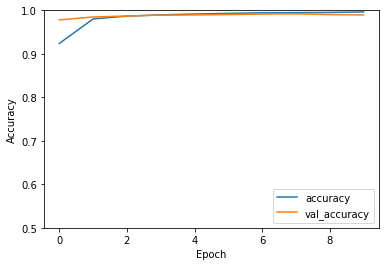

In [ ]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model2.evaluate(ds_test, verbose=2)

79/79 - 0s - loss: 0.0363 - accuracy: 0.9894 - 481ms/epoch - 6ms/step


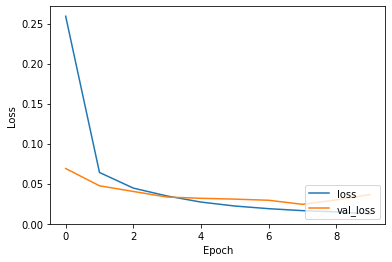

In [ ]:
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model2.evaluate(ds_test, verbose=2)

In [22]:
history2.history

{'accuracy': [0.9239000082015991,
  0.9802833199501038,
  0.9867500066757202,
  0.9896000027656555,
  0.991599977016449,
  0.9930499792098999,
  0.9944999814033508,
  0.9947666525840759,
  0.9952499866485596,
  0.9963833093643188],
 'loss': [0.2591607868671417,
  0.06397312134504318,
  0.04442507401108742,
  0.034568071365356445,
  0.026988498866558075,
  0.022050870582461357,
  0.018735552206635475,
  0.01627063751220703,
  0.014700247906148434,
  0.012179872952401638],
 'val_accuracy': [0.9781000018119812,
  0.9848999977111816,
  0.9868999719619751,
  0.9890999794006348,
  0.9894000291824341,
  0.9904000163078308,
  0.9914000034332275,
  0.9919000267982483,
  0.9902999997138977,
  0.9894000291824341],
 'val_loss': [0.06891880184412003,
  0.04731450974941254,
  0.040238313376903534,
  0.03325049579143524,
  0.03168483451008797,
  0.030644170939922333,
  0.0292435884475708,
  0.024183226749300957,
  0.029637262225151062,
  0.03632577508687973]}